# Traditional Credit Model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ASAS import FICOScoreModel
import Aid_traditional as aid
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from credit_score_model import calculate_traditional_credit_score

In [2]:
data = aid.clean_data_trad('data_traditional.csv')
df = pd.read_csv('credit_score.csv')

df['credit_utilization_ratio']
avg_utilization_ratio = df.groupby('customer_id')['credit_utilization_ratio'].mean().round().astype(int).reset_index()['credit_utilization_ratio']/100
data['avg_utilization_ratio'] = avg_utilization_ratio
data

,customer_id,avg_credit_history,avg_delay,avg_num_inquires,avg_outstanding_debt,avg_credit_mix,avg_credit_score,avg_utilization_ratio
0,CUS_0x1000,46,62,11,1563,0,0,0.33
1,CUS_0x1009,128,7,3,203,1,1,0.30
2,CUS_0x100b,67,14,2,1030,2,0,0.35
3,CUS_0x1011,66,27,7,473,1,1,0.28
4,CUS_0x1013,75,12,3,1234,2,1,0.32
...,...,...,...,...,...,...,...,...
12082,CUS_0xff3,72,12,4,1229,2,1,0.33
12083,CUS_0xff4,78,16,5,758,1,1,0.33
12084,CUS_0xff6,104,0,2,338,2,1,0.33
12085,CUS_0xffc,56,45,12,1300,0,0,0.35


In [3]:
resultado = calculate_traditional_credit_score(data)
resultado


,customer_id,avg_credit_history,avg_delay,avg_num_inquires,avg_outstanding_debt,avg_credit_mix,avg_credit_score,avg_utilization_ratio,history_score,delay_score,inquiries_score,debt_score,mix_score,total_score,fico_score,credit_category
0,CUS_0x1000,46,62,11,1563,0,0,0.33,60,10,10,50,30,27.0,448.50,0
1,CUS_0x1009,128,7,3,203,1,1,0.30,100,70,70,90,65,76.0,718.00,1
2,CUS_0x100b,67,14,2,1030,2,0,0.35,80,70,90,75,100,81.0,745.50,2
3,CUS_0x1011,66,27,7,473,1,1,0.28,80,40,40,90,65,59.0,624.50,1
4,CUS_0x1013,75,12,3,1234,2,1,0.32,80,70,70,75,100,78.0,729.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12082,CUS_0xff3,72,12,4,1229,2,1,0.33,80,70,70,75,100,78.0,729.00,1
12083,CUS_0xff4,78,16,5,758,1,1,0.33,80,40,70,75,65,60.5,632.75,1
12084,CUS_0xff6,104,0,2,338,2,1,0.33,100,100,90,90,100,96.5,830.75,2
12085,CUS_0xffc,56,45,12,1300,0,0,0.35,80,10,10,75,30,34.0,487.00,0


In [4]:
fico_model = FICOScoreModel()
df_results = fico_model.run(data)
df_results


,Customer ID,Avg Credit History,Avg Delay,Avg Num Inquires,Avg Outstanding Debt,Avg Credit Mix,Original Credit Score,Payment History Score,Amounts Owed Score,Length of History Score,Credit Mix Score,Inquiries Score,Calculated FICO Score
0,CUS_0x1000,46,62,11,1563,0,0,0.0,90,30,0,20,410
1,CUS_0x1009,128,7,3,203,1,1,70.0,100,100,50,50,696
2,CUS_0x100b,67,14,2,1030,2,0,40.0,90,60,100,90,687
3,CUS_0x1011,66,27,7,473,1,1,40.0,100,60,50,0,577
4,CUS_0x1013,75,12,3,1234,2,1,70.0,90,60,100,50,723
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12082,CUS_0xff3,72,12,4,1229,2,1,70.0,90,60,100,50,723
12083,CUS_0xff4,78,16,5,758,1,1,40.0,90,60,50,50,597
12084,CUS_0xff6,104,0,2,338,2,1,100.0,90,80,100,90,819
12085,CUS_0xffc,56,45,12,1300,0,0,0.0,90,60,0,20,434


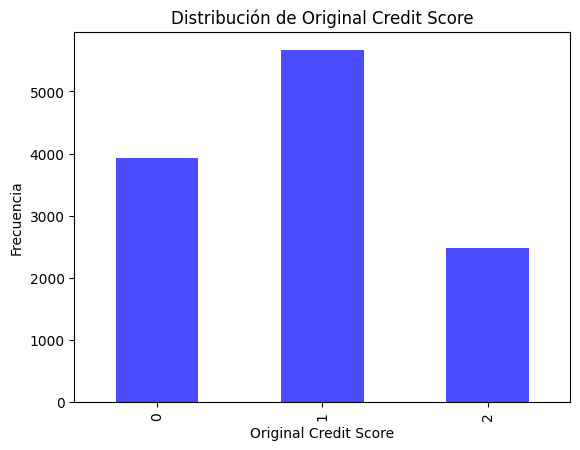

In [5]:
# Contar los valores y reindexarlos en el orden deseado
value_counts = df_results['Original Credit Score'].value_counts()
ordered_counts = value_counts.reindex([0, 1, 2])

# Graficar
ordered_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Distribución de Original Credit Score')
plt.xlabel('Original Credit Score')
plt.ylabel('Frecuencia')
plt.show()

<Axes: >

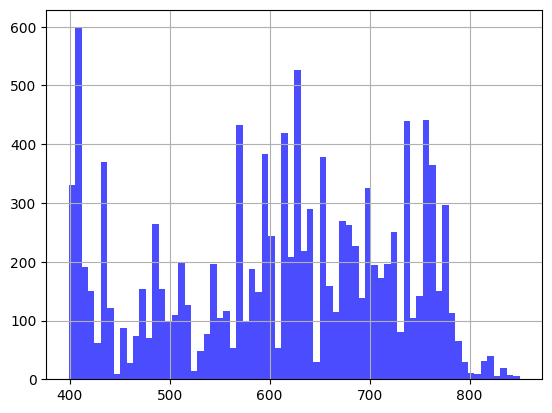

In [6]:
df_results['Calculated FICO Score'].hist(bins=70, color='blue', alpha=0.7)

<Axes: >

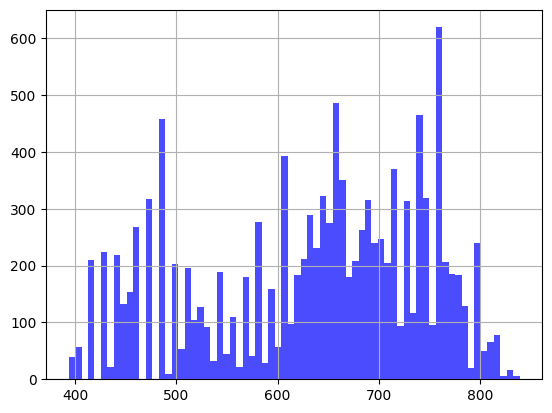

In [7]:
resultado['fico_score'].hist(bins=70, color='blue', alpha=0.7)

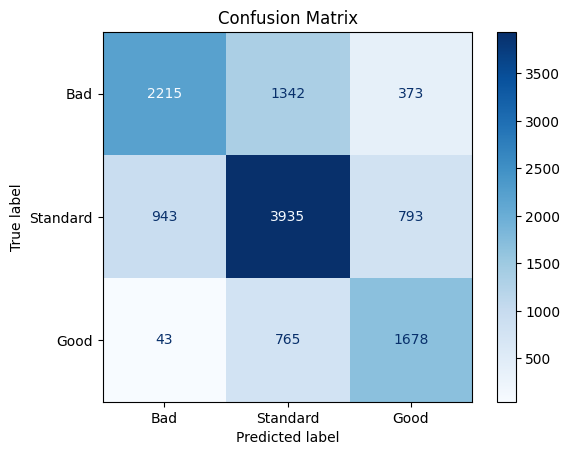

Accuracy: 0.6476

Macro-averaged metrics:
Precision: 0.6444
Recall: 0.6442
F1-score: 0.6409

Per-class metrics:

Bad Credit Score:
  Precision: 0.6920
  Recall: 0.5636
  F1-score: 0.6212

Standard Credit Score:
  Precision: 0.6513
  Recall: 0.6939
  F1-score: 0.6719

Good Credit Score:
  Precision: 0.5900
  Recall: 0.6750
  F1-score: 0.6296

Detailed Classification Report:
              precision    recall  f1-score   support

         Bad       0.69      0.56      0.62      3930
    Standard       0.65      0.69      0.67      5671
        Good       0.59      0.67      0.63      2486

    accuracy                           0.65     12087
   macro avg       0.64      0.64      0.64     12087
weighted avg       0.65      0.65      0.65     12087


Metrics Table:
      Class  Precision    Recall  F1-score
0       Bad   0.691971  0.563613  0.621231
1  Standard   0.651274  0.693881  0.671903
2      Good   0.590014  0.674980  0.629644


In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

df_results['Predicted Credit Score'] = df_results['Calculated FICO Score'].apply(aid.classify_fico)

y_true = df_results['Original Credit Score']
y_pred = df_results['Predicted Credit Score']

cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Calculate basic metrics
accuracy = accuracy_score(y_true, y_pred)
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

# Calculate metrics for each class
precision_per_class = precision_score(y_true, y_pred, average=None, labels=[0, 1, 2])
recall_per_class = recall_score(y_true, y_pred, average=None, labels=[0, 1, 2])
f1_per_class = f1_score(y_true, y_pred, average=None, labels=[0, 1, 2])

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nMacro-averaged metrics:")
print(f"Precision: {precision_macro:.4f}")
print(f"Recall: {recall_macro:.4f}")
print(f"F1-score: {f1_macro:.4f}")

print("\nPer-class metrics:")
class_names = ['Bad', 'Standard', 'Good']
for i, class_name in enumerate(class_names):
    print(f"\n{class_name} Credit Score:")
    print(f"  Precision: {precision_per_class[i]:.4f}")
    print(f"  Recall: {recall_per_class[i]:.4f}")
    print(f"  F1-score: {f1_per_class[i]:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Create a DataFrame to store metrics
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision_per_class,
    'Recall': recall_per_class,
    'F1-score': f1_per_class
})

# Display metrics as a table
print("\nMetrics Table:")
print(metrics_df)



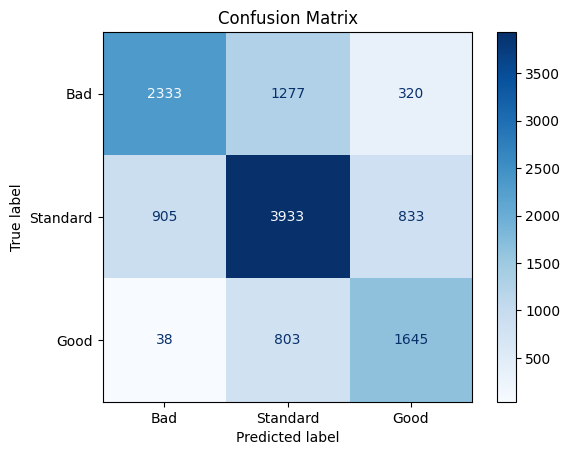

Accuracy: 0.6545

Macro-averaged metrics:
Precision: 0.6514
Recall: 0.6496
F1-score: 0.6478

Per-class metrics:

Bad Credit Score:
  Precision: 0.7121
  Recall: 0.5936
  F1-score: 0.6475

Standard Credit Score:
  Precision: 0.6541
  Recall: 0.6935
  F1-score: 0.6732

Good Credit Score:
  Precision: 0.5879
  Recall: 0.6617
  F1-score: 0.6226

Detailed Classification Report:
              precision    recall  f1-score   support

         Bad       0.71      0.59      0.65      3930
    Standard       0.65      0.69      0.67      5671
        Good       0.59      0.66      0.62      2486

    accuracy                           0.65     12087
   macro avg       0.65      0.65      0.65     12087
weighted avg       0.66      0.65      0.65     12087


Metrics Table:
      Class  Precision    Recall  F1-score
0       Bad   0.712149  0.593639  0.647516
1  Standard   0.654083  0.693528  0.673228
2      Good   0.587920  0.661706  0.622634


In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

y_true = resultado['avg_credit_score']
y_pred = resultado['credit_category']

cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad', 'Standard', 'Good'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Calculate basic metrics
accuracy = accuracy_score(y_true, y_pred)
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

# Calculate metrics for each class
precision_per_class = precision_score(y_true, y_pred, average=None, labels=[0, 1, 2])
recall_per_class = recall_score(y_true, y_pred, average=None, labels=[0, 1, 2])
f1_per_class = f1_score(y_true, y_pred, average=None, labels=[0, 1, 2])

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nMacro-averaged metrics:")
print(f"Precision: {precision_macro:.4f}")
print(f"Recall: {recall_macro:.4f}")
print(f"F1-score: {f1_macro:.4f}")

print("\nPer-class metrics:")
class_names = ['Bad', 'Standard', 'Good']
for i, class_name in enumerate(class_names):
    print(f"\n{class_name} Credit Score:")
    print(f"  Precision: {precision_per_class[i]:.4f}")
    print(f"  Recall: {recall_per_class[i]:.4f}")
    print(f"  F1-score: {f1_per_class[i]:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Create a DataFrame to store metrics
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision_per_class,
    'Recall': recall_per_class,
    'F1-score': f1_per_class
})

# Display metrics as a table
print("\nMetrics Table:")
print(metrics_df)


In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

In [11]:
'''
# Use all features except the target columns
X = df_results.drop(columns=['Customer ID', 'Calculated FICO Score', 'Original Credit Score'])
y = df_results['Original Credit Score']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

# Train classifiers (they will output probabilities for each class)
clf1 = LogisticRegression(max_iter=10000)
clf1.fit(X_train, y_train)
y_pred_prob1 = clf1.predict_proba(X_test)

clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
y_pred_prob2 = clf2.predict_proba(X_test)

# Binarize the true labels for the ROC computation
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10, 8))
# Plot ROC for each class for both classifiers
for i, class_label in enumerate(classes):
    fpr1, tpr1, _ = roc_curve(y_test_bin[:, i], y_pred_prob1[:, i])
    auc1 = roc_auc_score(y_test_bin[:, i], y_pred_prob1[:, i])
    plt.plot(fpr1, tpr1, label=f'Logistic Regression Class {class_label} (AUC = {auc1:.2f})')
    
    fpr2, tpr2, _ = roc_curve(y_test_bin[:, i], y_pred_prob2[:, i])
    auc2 = roc_auc_score(y_test_bin[:, i], y_pred_prob2[:, i])
    plt.plot(fpr2, tpr2, label=f'Random Forest Class {class_label} (AUC = {auc2:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve Comparison')
plt.legend()
plt.show()
'''

"\n# Use all features except the target columns\nX = df_results.drop(columns=['Customer ID', 'Calculated FICO Score', 'Original Credit Score'])\ny = df_results['Original Credit Score']\n\n# Split the dataset\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)\n\n# Train classifiers (they will output probabilities for each class)\nclf1 = LogisticRegression(max_iter=10000)\nclf1.fit(X_train, y_train)\ny_pred_prob1 = clf1.predict_proba(X_test)\n\nclf2 = RandomForestClassifier()\nclf2.fit(X_train, y_train)\ny_pred_prob2 = clf2.predict_proba(X_test)\n\n# Binarize the true labels for the ROC computation\nclasses = np.unique(y)\ny_test_bin = label_binarize(y_test, classes=classes)\n\nplt.figure(figsize=(10, 8))\n# Plot ROC for each class for both classifiers\nfor i, class_label in enumerate(classes):\n    fpr1, tpr1, _ = roc_curve(y_test_bin[:, i], y_pred_prob1[:, i])\n    auc1 = roc_auc_score(y_test_bin[:, i], y_pred_prob1[:, i])\n    plt.plot(fpr1, tpr1, label=f'Logist